<a href="https://colab.research.google.com/github/deysi-caraballo/tfm/blob/main/TFM_entrenamiento_ML_preguntas_preprocesadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación del dataset crudo en formato Parquet

En primer lugar, nos preparamos para descargar el fichero Parquet de datos crudos desde Google Cloud Storage hasta nuestro sistema de ficheros local de Google Colab

In [7]:
import os
import google.auth

In [8]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/sa.json'

In [9]:
!export GOOGLE_APPLICATION_CREDENTIALS=/content/sa.json

In [10]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/sa.json


In [11]:
!gcloud config set project '800463162730' #'snappy-guard-389922'

Are you sure you wish to set property [core/project] to 800463162730?

Do you want to continue (Y/n)?  Y

Updated property [core/project].


In [12]:
!gcloud auth login --cred-file=$GOOGLE_APPLICATION_CREDENTIALS


You are already authenticated with 
'tfm-pasalera@snappy-guard-389922.iam.gserviceaccount.com'.
Do you wish to proceed and overwrite existing credentials?

Do you want to continue (Y/n)?  Y


Authenticated with service account credentials for: [tfm-pasalera@snappy-guard-389922.iam.gserviceaccount.com].
Your current project is [800463162730].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [13]:
!gsutil cp gs://dataprep-staging-f1ae6292-d58f-4922-af3a-1cf0b5492123/mendoza.dc6@gmail.com/jobrun/preguntas-preprocesado-aumentado.parquet /content/preguntas-preprocesado.parquet

Copying gs://dataprep-staging-f1ae6292-d58f-4922-af3a-1cf0b5492123/mendoza.dc6@gmail.com/jobrun/preguntas-preprocesado-aumentado.parquet...
\ [1 files][  9.2 MiB/  9.2 MiB]                                                
Operation completed over 1 objects/9.2 MiB.                                      


# Lectura del fichero Parquet como DataFrame de pandas

In [14]:
!pip install pandas

In [15]:
!pip install python-snappy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 7.0 MB/s eta 0:00:00


In [3]:
import pandas as pd

preguntas_df = pd.read_parquet('/content/preguntas-preprocesado.parquet', engine='pyarrow')

In [4]:
preguntas_df = preguntas_df[['texto', 'id_ministerio', 'split']]
preguntas_df

,texto,id_ministerio,split
0,"¿Qué inversiones fueron realizadas, detallando...",11,train
1,¿Cuál es el estado de ejecución presupuestaria...,11,train
2,¿Cuál es la variación anual del alumnado en la...,14,train
3,¿Cuál es la media de edad de los miembros de l...,4,train
4,¿Qué presupuesto y actuaciones tiene prevista ...,7,train
...,...,...,...
1515,¿Cuál es el número de abogados/as del turno de...,3,test
4616,¿Qué previsión contempla el Gobierno en la eje...,5,test
4309,Entre 1 de enero de 2018 y 31 de marzo del mis...,5,test
4847,El Instituto Elcano ha venido elaborando el ''...,6,test


Definimos la lista de ministerios para que sea mostrada posteriormente en los reportes de evaluación

In [33]:
lista_ministerios = ['M. de Defensa',\
                     'M. de Justicia',\
                     'M. del Interior',\
                     'M. de Fomento',\
                     'M. de Asuntos Exteriores y de Cooperación',\
                     'M. de Hacienda y Función Pública',\
                     'M. de Empleo y Seguridad Social',\
                     'M. de Economía, Industria y Competitividad',\
                     'M. de Energía, Turismo y Agenda Digital',\
                     'M. de Agricultura y Pesca, Alimentación y Medio Ambiente',\
                     'M. de la Presidencia y para las Administraciones Territoriales',\
                     'M. de Sanidad, Servicios Sociales e Igualdad',\
                     'M. de Educación, Cultura y Deporte']

# Análisis del dataset crudo

Antes de continuar, vamos a verificar que los documentos están correctamente balanceados para todos los posibles ministerios. Para ello, vamos a representar gráficamente cuántos documentos hay en nuestro conjunto de entrenamiento por cada posible ministerio.

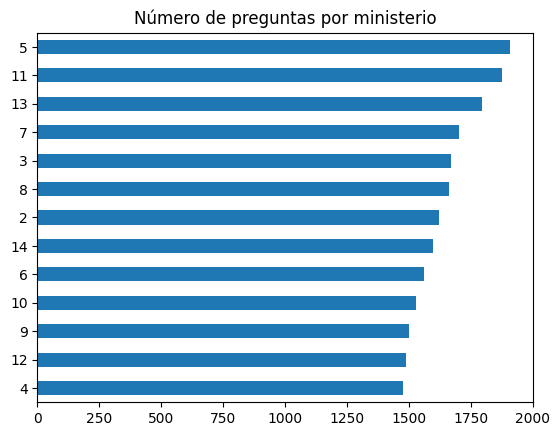

In [18]:
import matplotlib.pyplot as plt

preguntas_df[preguntas_df['split'] == 'train']["id_ministerio"].value_counts(ascending=True).plot.barh()
plt.title("Número de preguntas por ministerio")
plt.rcParams['figure.figsize'] = [20, 50]
plt.show()

Efectivamente, el trabajo realizado en el notebook de optimización del dataset ha sido bueno y ha producido un dataset de entrenamiento equilibrado.

Separamos ahora nuestros datasets de entrenamiento y test en dos dataframes diferentes

In [5]:
train_df = preguntas_df[preguntas_df['split'] == 'train']
test_df = preguntas_df[preguntas_df['split'] == 'test']

In [20]:
train_df.describe()

,id_ministerio
count,21390.000000
mean,8.008462
std,3.742166
min,2.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,14.000000


In [21]:
print(train_df)

                                                   texto  id_ministerio  split
0      ¿Qué inversiones fueron realizadas, detallando...             11  train
1      ¿Cuál es el estado de ejecución presupuestaria...             11  train
2      ¿Cuál es la variación anual del alumnado en la...             14  train
3      ¿Cuál es la media de edad de los miembros de l...              4  train
4      ¿Qué presupuesto y actuaciones tiene prevista ...              7  train
...                                                  ...            ...    ...
21385  el pasado 9 de febrero de 2018 el gobierno de ...             12  train
21386  ¿ cual, pero y en que situacion se encuentran ...             12  train
21387  ¿ cree el gobierno que deberia reformarse la c...             12  train
21388  lo cual es la opinion del gobierno tiene relac...             12  train
21389  segun informo el diario el pais, el general 16...             12  train

[21390 rows x 3 columns]


In [22]:
test_df.describe()

,id_ministerio
count,1580.000000
mean,7.306962
std,3.545071
min,2.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,14.000000


In [23]:
print(test_df)

                                                  texto  id_ministerio split
6148  ¿Dispone el Ministerio de Agricultura y Pesca,...             11  test
1236  En la provincia de A Coruña: ¿Cuál es la relac...              2  test
213   Hace meses el President Carles Puigdemont denu...              4  test
3557  ¿Qué compañías de vuelos chárter se han puesto...              5  test
4942  ¿Cuál fue el importe de las transferencias, pr...              7  test
...                                                 ...            ...   ...
1515  ¿Cuál es el número de abogados/as del turno de...              3  test
4616  ¿Qué previsión contempla el Gobierno en la eje...              5  test
4309  Entre 1 de enero de 2018 y 31 de marzo del mis...              5  test
4847  El Instituto Elcano ha venido elaborando el ''...              6  test
6201  Río o barranco de Barranc dels Mussols a su pa...             11  test

[1580 rows x 3 columns]


# Entrenando un modelo de clasificación

Para desarrollar el ejercicio vamos a entrenar un modelo de clasificación mediante diferentes variantes de un clasificador bayesiano ingenuo (Naïve Bayes).

En general, un clasificador bayesiano ingenuo, como todos los modelos de machine learning, necesitan convertir todos los datos de entrada en números, particularmente en vectores de números. Esto es lo que se denomina "vectorizar", en nuestro caso, un texto de entrada. Existen diferentes formas de vectorizar, pero nosotros nos vamos a centrar en una: el indicador TF-IDF, que mide la relevancia de los términos (mediante un TfidfVectorizer).

Sin embargo, las frases contienen muchos elementos que pueden generar ruido, al margen de que cada fase es, en este momento, una cadena de texto. Para que un vectorizador pueda hacer su trabajo siempre se apoya en un conjunto de parámetros clave:

* Una lista de palabras del lenguaje que no aportan valor, lo que denomimos "stop words".
* Un tamaño mínimo y máximo de los n-gramas que deseamos tener en cuenta (por ejemplo, tokens individuales, conjuntos de 2 tokens y conjuntos de 3 tokens). Para nuestro caso usaremos n-gramas de entre 1 y 3 tokens.
* Un tokenizador, es decir, una función que, a partir de las cadenas de texto, extraiga los diferentes términos (tokens)

## Opción 1: Algoritmo: Naïve Bayes multinomial - Vectorizador: `TfidfVectorizer`

In [24]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Comenzamos con la tokenización y vectorización de los textos:

In [25]:
!pip install -U pip setuptools wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 48.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [1]:
!pip install -U 'spacy[cuda-autodetect]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 58.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 MB 18.2 MB/s eta 0:00:00
  Created wheel for cupy-wheel: filename=cupy_wheel-12.1.0.post1-py3-none-any.whl size=1056 sha256=21dfb6aaa81825afef5d10f5b981d013cff3774479500745f178c7e040f6f260
  Stored in directory: /root/.cache/pip/wheels/6c/52/1e/81ea89a4b892492c8fd6ab681d6eb0eef1f95c65d4541e746d
Successfully built cupy-wheel
  Attempting uninstall: cupy-cuda11x
    Found existing installation: cupy-cuda11x 11.0.0
    Uninstalling cupy-cuda11x-11.0.0:
      Successfully uninstalled cupy-cuda11x-11.0.0
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
    Uninstalling spacy-3.5.4:
      Successfully uninstalled spacy-3.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [2]:
!python -m spacy download es_dep_news_trf

2023-07-13 16:45:09.205372: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-13 16:45:09.259949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 16:45:10.297126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.2/410.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 74.3 MB/s eta 0:00:00
     ━━━━

In [7]:
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.es.stop_words import STOP_WORDS

nltk.download('punkt')

tfidfv = TfidfVectorizer(stop_words=list(STOP_WORDS), ngram_range = (1, 3), tokenizer = word_tokenize)

X1_train = tfidfv.fit_transform(train_df['texto'])
X1_test = tfidfv.transform(test_df['texto'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


`X1_train` y `X1_test` son matrices donde cada fila representa un texto del conjunto de entrenamiento y evaluación, respectivamente, y cada columna representa uno de los posibles n-gramas:

In [40]:
X1_train.shape

(21390, 785645)

Y almacenamos en una Serie de pandas el conjunto de etiquetas (columna `id_ministerio`) tanto del dataset de entrenamiento como del de evaluación, pero transformadas a cadena de texto.

Esto lo hacemos así porque más adelante, para evaluar nuestro modelo, necesitamos que las etiquetas sean cadenas de texto, y en este momento son números enteros

In [9]:
y_train = train_df['id_ministerio'].apply(lambda x: str(x))
y_test = test_df['id_ministerio'].apply(lambda x: str(x))

Vamos ahora a intentar encontrar el valor más apropiado para alguno de los hiperparámetros del algoritmo de entrenamiento.

Para ello podemos utilizar GridSearchCV, una clase de scikit-learn que implementa la búsqueda exhaustiva por rejilla, que permite buscar los mejores hiperparámetros para un modelo utilizando validación cruzada. En nuestro caso, haremos un cálculo de validación cruzada con 6 divisiones (`cv=6`), usando los valores de alpha para la regilla de 0.1, 1 y 10.

Y para poder aplicarlo hay que indicarle, previamente, el tipo de algoritmo de clasificación que vamos a utilizar (en nuestro caso, comenzaremos con un clasificador Naïve Bayes multinomial, implementado por la clase `MultinomialNB` de scikit-learn.

El parámetro `verbose=3` nos asegura que se mostrará información detallada de lo que hacemos.

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

clf_multinomial_nb = MultinomialNB()

param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(clf_multinomial_nb, param_grid, cv=10, verbose=3)
grid_search.fit(X1_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
val_score = grid_search.score(X1_test, y_test)
print("Validation accuracy:", val_score)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .......................alpha=0.01;, score=0.965 total time=   0.6s
[CV 2/10] END .......................alpha=0.01;, score=0.978 total time=   0.6s
[CV 3/10] END .......................alpha=0.01;, score=0.985 total time=   0.6s
[CV 4/10] END .......................alpha=0.01;, score=0.981 total time=   0.6s
[CV 5/10] END .......................alpha=0.01;, score=0.987 total time=   0.6s
[CV 6/10] END .......................alpha=0.01;, score=0.982 total time=   0.6s
[CV 7/10] END .......................alpha=0.01;, score=0.990 total time=   0.6s
[CV 8/10] END .......................alpha=0.01;, score=0.985 total time=   0.6s
[CV 9/10] END .......................alpha=0.01;, score=0.983 total time=   0.6s
[CV 10/10] END ......................alpha=0.01;, score=0.984 total time=   0.6s
[CV 1/10] END ........................alpha=0.1;, score=0.958 total time=   0.6s
[CV 2/10] END ........................alpha=0.1;

Y ahora que tenemos identificado el valor óptimo del hiperparámetro `alpha`, procedemos a entrenar nuestro modelo:

In [11]:
clf_multinomial_nb = MultinomialNB(alpha=grid_search.best_params_['alpha'])

clf_multinomial_nb.fit(X1_train, y_train)

test_score = clf_multinomial_nb.score(X1_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.8689873417721519


Mostramos, finalmente, los resultados de nuestro modelo para cada posible ministerio y de manera global:

In [39]:
from sklearn.metrics import classification_report

y_pred = clf_multinomial_nb.predict(X1_test)

# Para las posibles etiquetas, solo se contemplan los valores comprendidos entre 2 y 14,
# ambos incluidos, pero expresados como cadena de texto
report = classification_report(y_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       1.00      0.73      0.85        45
                                                M. de Justicia       0.94      0.71      0.81        84
                                               M. del Interior       0.86      0.93      0.89       369
                                                 M. de Fomento       0.85      0.96      0.90       238
                     M. de Asuntos Exteriores y de Cooperación       0.80      0.85      0.82        33
                              M. de Hacienda y Función Pública       0.94      0.89      0.92       142
                               M. de Empleo y Seguridad Social       0.84      0.85      0.85       139
                    M. de Economía, Industria y Competitividad       0.54      0.42      0.47        31
                       M. de Energía, Turismo y Agenda Digital 

La verdad es que el modelo ha funcionado razonablemente bien, con valores relativamente altos de F1 tanto la mayoría de los ministerios (pero con excepciones, como el caso del Ministerio de la Presidencia) como para la F1-macro y la F1-ponderada.

## Opción 2: Algoritmo: Naïve Bayes Bernuilli - Vectorizador: `TfidfVectorizer`

Vamos a probar el resultado del algoritmo de Naïve Bayes de Bernuilli con el vectorizador basado en TF-IDF.

Seguimos los pasos análogos a las opciones anteriores:

In [13]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

clf_bernoulli_nb = BernoulliNB()

param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search2 = GridSearchCV(clf_bernoulli_nb, param_grid, cv=10, verbose=3)
grid_search2.fit(X1_train, y_train)

print("Best hyperparameters:", grid_search2.best_params_)
val_score = grid_search2.score(X1_test, y_test)
print("Validation accuracy:", val_score)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .......................alpha=0.01;, score=0.836 total time=   0.9s
[CV 2/10] END .......................alpha=0.01;, score=0.861 total time=   0.9s
[CV 3/10] END .......................alpha=0.01;, score=0.876 total time=   0.9s
[CV 4/10] END .......................alpha=0.01;, score=0.865 total time=   0.8s
[CV 5/10] END .......................alpha=0.01;, score=0.866 total time=   0.8s
[CV 6/10] END .......................alpha=0.01;, score=0.876 total time=   0.9s
[CV 7/10] END .......................alpha=0.01;, score=0.864 total time=   0.9s
[CV 8/10] END .......................alpha=0.01;, score=0.872 total time=   0.9s
[CV 9/10] END .......................alpha=0.01;, score=0.870 total time=   0.9s
[CV 10/10] END ......................alpha=0.01;, score=0.862 total time=   0.9s
[CV 1/10] END ........................alpha=0.1;, score=0.777 total time=   0.8s
[CV 2/10] END ........................alpha=0.1;

Y ahora que tenemos identificado el valor óptimo del hiperparámetro `alpha`, procedemos a entrenar nuestro modelo:

In [14]:
clf_bernoulli_nb = BernoulliNB(alpha=grid_search2.best_params_['alpha'])

clf_bernoulli_nb.fit(X1_train, y_train)

test_score = clf_bernoulli_nb.score(X1_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.7506329113924051


Mostramos, finalmente, los resultados de nuestro modelo para cada posible ministerio y de manera global:

In [38]:
y_pred = clf_bernoulli_nb.predict(X1_test)
report2 = classification_report(y_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report2)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       1.00      0.53      0.70        45
                                                M. de Justicia       0.93      0.31      0.46        84
                                               M. del Interior       0.73      0.93      0.82       369
                                                 M. de Fomento       0.83      0.84      0.83       238
                     M. de Asuntos Exteriores y de Cooperación       0.79      0.45      0.58        33
                              M. de Hacienda y Función Pública       0.77      0.89      0.82       142
                               M. de Empleo y Seguridad Social       0.46      0.88      0.60       139
                    M. de Economía, Industria y Competitividad       0.75      0.19      0.31        31
                       M. de Energía, Turismo y Agenda Digital 

El rendimiento del algoritmo ha sido en este caso considerablemente peor, tanto en la precisión global como en la métrica F1 en todas sus visiones: por categoría, macro y ponderada.

## Opción 3: Algoritmo: Complement Naïve Bayes - Vectorizador: `TfidfVectorizer`

Acabamos nuestro ciclo de experimentos de machine learning basadas en Naïve Bayes usando el algoritmo Complement Naïve Bayes y el vectorizador basado en TF-IDF, como en los casos anteriores

In [16]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
import numpy as np

clf_complement_nb = ComplementNB()

param_grid = {'alpha': np.logspace(1,-9, num=110)}
grid_search4 = GridSearchCV(clf_complement_nb, param_grid, cv=6, verbose=3)
grid_search4.fit(X1_train, y_train)

print("Best hyperparameters:", grid_search4.best_params_)
val_score = grid_search4.score(X1_test, y_test)
print("Validation accuracy:", val_score)

Fitting 6 folds for each of 110 candidates, totalling 660 fits
[CV 1/6] END ........................alpha=10.0;, score=0.901 total time=   0.6s
[CV 2/6] END ........................alpha=10.0;, score=0.915 total time=   0.6s
[CV 3/6] END ........................alpha=10.0;, score=0.921 total time=   0.6s
[CV 4/6] END ........................alpha=10.0;, score=0.910 total time=   0.6s
[CV 5/6] END ........................alpha=10.0;, score=0.913 total time=   0.6s
[CV 6/6] END ........................alpha=10.0;, score=0.908 total time=   0.6s
[CV 1/6] END ...........alpha=8.095746126715333;, score=0.905 total time=   0.6s
[CV 2/6] END ...........alpha=8.095746126715333;, score=0.920 total time=   0.6s
[CV 3/6] END ...........alpha=8.095746126715333;, score=0.926 total time=   0.6s
[CV 4/6] END ...........alpha=8.095746126715333;, score=0.915 total time=   0.6s
[CV 5/6] END ...........alpha=8.095746126715333;, score=0.919 total time=   0.6s
[CV 6/6] END ...........alpha=8.09574612671533

Y ahora que tenemos identificado el valor óptimo del hiperparámetro `alpha`, procedemos a entrenar nuestro modelo:

In [17]:
clf_complement_nb = ComplementNB(alpha=grid_search4.best_params_['alpha'])

clf_complement_nb.fit(X1_train, y_train)

test_score = clf_complement_nb.score(X1_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.8778481012658228


Finalizamos el análisis de esta opción con el reporte habitual:

In [37]:
from sklearn.metrics import classification_report

y_pred = clf_complement_nb.predict(X1_test.toarray())
report3 = classification_report(y_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report3)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       0.88      0.78      0.82        45
                                                M. de Justicia       0.85      0.67      0.75        84
                                               M. del Interior       0.91      0.93      0.92       369
                                                 M. de Fomento       0.87      0.95      0.91       238
                     M. de Asuntos Exteriores y de Cooperación       0.65      0.85      0.74        33
                              M. de Hacienda y Función Pública       0.94      0.88      0.91       142
                               M. de Empleo y Seguridad Social       0.89      0.84      0.87       139
                    M. de Economía, Industria y Competitividad       0.62      0.65      0.63        31
                       M. de Energía, Turismo y Agenda Digital 

Esta variante de clasificador Naïve Bayes mejora ligeramente la versión multinomial a la vista de la puntuación F1, tanto para las categorías individuales (con la excepción del Ministerio de la Presidencia) como para la versión ponderada (de 0.87 sube a 0.88). La versión macro se mantiene inalterada en 0.78.

# Evaluando el modelo de preguntas preprocesadas con preguntas crudas

En el contexto real, a pesar de haber empleado un dataset preprocesado para realizar el entrenamiento, el modelo va a recibir como entrada siempre textos crudos, sin preprocesar.

Vemos a continuación, para cada uno de los modelos generados, cómo varían las métricas de evaluación cuando usamos como dataset de test el formado por las preguntas crudas.

In [19]:
!gsutil cp gs://dataprep-staging-f1ae6292-d58f-4922-af3a-1cf0b5492123/mendoza.dc6@gmail.com/jobrun/preguntas-crudo-aumentado.parquet /content/preguntas-crudo.parquet

Copying gs://dataprep-staging-f1ae6292-d58f-4922-af3a-1cf0b5492123/mendoza.dc6@gmail.com/jobrun/preguntas-crudo-aumentado.parquet...
\ [1 files][ 14.4 MiB/ 14.4 MiB]                                                
Operation completed over 1 objects/14.4 MiB.                                     


In [20]:
preguntas_crudas_df = pd.read_parquet('/content/preguntas-crudo.parquet', engine='pyarrow')

In [21]:
preguntas_crudas_df = preguntas_crudas_df[['texto', 'id_ministerio', 'split']]
preguntas_crudas_df

,texto,id_ministerio,split
0,Grupo Parlamentario Socialista de Cortes Gener...,5,train
1,C.DIP 80898 20/03/2018 19:46 CS Congreso de lo...,10,train
2,C.DIP 79938 14/03/2018 17:32 A LA MESA DEL CON...,5,train
3,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,11,train
4,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,11,train
...,...,...,...
7608,Grupo Parlamentario Socialista de Cortes Gener...,13,test
2915,C. DIP 84160 11/04/2018 18:22 GRUPO PARLAMENTA...,5,test
7874,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,14,test
3582,Grupo Parlamentario Socialista de Cortes Gener...,5,test


In [22]:
test_crudas_df = preguntas_crudas_df[preguntas_crudas_df['split'] == 'test']
test_crudas_df

,texto,id_ministerio,split
5182,Grupo Parlamentario Socialista de Cortes Gener...,8,test
4486,BRE 6 SENADO AUTORES: SENADO XII LEGISLATURA R...,7,test
6217,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,11,test
4702,BRE 6 SENADO AUTORES: SENADO XII LEGISLATURA R...,8,test
619,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,3,test
...,...,...,...
7608,Grupo Parlamentario Socialista de Cortes Gener...,13,test
2915,C. DIP 84160 11/04/2018 18:22 GRUPO PARLAMENTA...,5,test
7874,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,14,test
3582,Grupo Parlamentario Socialista de Cortes Gener...,5,test


In [23]:
X1_crudas_test = tfidfv.transform(test_crudas_df['texto'])

In [24]:
y_crudas_test = test_crudas_df['id_ministerio'].apply(lambda x: str(x))

## Evaluación del modelo NB Multinomial con preguntas crudas

In [36]:
from sklearn.metrics import classification_report

y_pred = clf_multinomial_nb.predict(X1_crudas_test)

# Para las posibles etiquetas, solo se contemplan los valores comprendidos entre 2 y 14,
# ambos incluidos, pero expresados como cadena de texto
report = classification_report(y_crudas_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       0.98      0.89      0.93        45
                                                M. de Justicia       0.83      0.91      0.87        85
                                               M. del Interior       0.80      0.98      0.88       370
                                                 M. de Fomento       0.90      0.88      0.89       240
                     M. de Asuntos Exteriores y de Cooperación       0.94      0.88      0.91        33
                              M. de Hacienda y Función Pública       0.97      0.97      0.97       142
                               M. de Empleo y Seguridad Social       0.94      0.79      0.86       140
                    M. de Economía, Industria y Competitividad       0.95      0.61      0.75        31
                       M. de Energía, Turismo y Agenda Digital 

Sorprendentemente, el modelo entrenado con preguntas preprocesadas se comporta mejor cuando recibe preguntas crudas que cuando las recibía también preprocesadas. Todas las categorías tienen una puntuación alta en la métrica F1, así como las versiones macro y ponderada.

## Evaluación del modelo NB Bernoulli con preguntas crudas

In [35]:
from sklearn.metrics import classification_report

y_pred = clf_bernoulli_nb.predict(X1_crudas_test)

# Para las posibles etiquetas, solo se contemplan los valores comprendidos entre 2 y 14,
# ambos incluidos, pero expresados como cadena de texto
report = classification_report(y_crudas_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       1.00      0.82      0.90        45
                                                M. de Justicia       0.98      0.76      0.86        85
                                               M. del Interior       0.68      0.99      0.80       370
                                                 M. de Fomento       0.81      0.82      0.81       240
                     M. de Asuntos Exteriores y de Cooperación       0.90      0.55      0.68        33
                              M. de Hacienda y Función Pública       0.85      0.96      0.90       142
                               M. de Empleo y Seguridad Social       0.97      0.71      0.82       140
                    M. de Economía, Industria y Competitividad       0.92      0.39      0.55        31
                       M. de Energía, Turismo y Agenda Digital 

También en este caso mejora respecto a preguntas de evaluación preprocesadas, pero no llega al nivel del caso anterior.

## Evaluación del modelo Complement NB con preguntas crudas

In [34]:
from sklearn.metrics import classification_report

y_pred = clf_complement_nb.predict(X1_crudas_test)

# Para las posibles etiquetas, solo se contemplan los valores comprendidos entre 2 y 14,
# ambos incluidos, pero expresados como cadena de texto
report = classification_report(y_crudas_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       0.95      0.93      0.94        45
                                                M. de Justicia       0.90      0.91      0.90        85
                                               M. del Interior       0.91      0.99      0.95       370
                                                 M. de Fomento       0.97      0.89      0.93       240
                     M. de Asuntos Exteriores y de Cooperación       0.91      0.88      0.89        33
                              M. de Hacienda y Función Pública       0.96      0.97      0.97       142
                               M. de Empleo y Seguridad Social       0.95      0.84      0.89       140
                    M. de Economía, Industria y Competitividad       0.92      0.77      0.84        31
                       M. de Energía, Turismo y Agenda Digital 

De nuevo, los resultados son significativamente mejores con este modelo, usando preguntas sin procesar para su evaluación.

# Versión multi-etiqueta

Nuestro caso de uso es atípico, ya que nuestro dataset de origen es mono-etiqueta. Lo que se desea es, en realidad, etiquetar cada pregunta con los tres ministerios más probables, ordenados de manera decreciente.

Por tanto, no se trata de un caso al uso de entrenamiento multi-etiqueta, sino de utilizar los modelos ya generados mono-etiqueta y hacer la valoración de las probabilidades de cada categoría, para quedarnos con las 3 más altas.

Para esto nos apoyaremos en la función `predict_proba`, que devuelve para cada texto un array con las probabilidades asociadas a cada categoría. Usaremos este array para generar las respuestas

In [84]:
categorias = ['10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9']

def predecir_multi_prob(pregunta):
  pregunta_vectorizada = tfidfv.transform([pregunta])
  y_pred_prob = clf_complement_nb.predict_proba(pregunta_vectorizada)
  y_pred_prob_etiquetados = zip(categorias, y_pred_prob.tolist()[0])
  y_pred_prob_etiquetados = list(y_pred_prob_etiquetados)
  y_pred_prob_etiquetados.sort(reverse=True, key=lambda x:x[1])
  return y_pred_prob_etiquetados[0:3]

mis_y_pred_prob_etiquetados = predecir_multi_prob('¿Van a subir este año las pensiones?')

In [85]:
print(mis_y_pred_prob_etiquetados)

[('7', 0.34578280370801706), ('5', 0.08393971767817138), ('8', 0.07717103372780786)]


In [87]:
def predecir_multi(pregunta):
  pregunta_vectorizada = tfidfv.transform([pregunta])
  y_pred_prob = clf_complement_nb.predict_proba(pregunta_vectorizada)
  y_pred_prob_etiquetados = zip(categorias, y_pred_prob.tolist()[0])
  y_pred_prob_etiquetados = list(y_pred_prob_etiquetados)
  y_pred_prob_etiquetados.sort(reverse=True, key=lambda x:x[1])
  y_pred = list(map(lambda x:x[0], y_pred_prob_etiquetados))
  return y_pred[0:3]

mis_y_pred_etiquetados = predecir_multi('¿Van a subir este año las pensiones?')

In [88]:
print(mis_y_pred_etiquetados)

['7', '5', '8']
